### Table of Contents
    1.Import Libraries
    2.Load Data
    3.Get some information about the data
    4.Summary of Data
    5.columns Description
    6.Issues with Data sets
    7.order to clean data
    8.Data Cleaning
    9.EDA
    10. Feature Engineering
    11. Conclusions


**1.Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2.Load Data**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/insurance_data.csv')

**3.Get some information about the data**

In [3]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


**4.Summary of Data**

`    This dataset contains insightful information related to insurance claims, giving us an in-depth look into the demographic patterns of those receiving them. The dataset contains information on patient age, gender, BMI (Body Mass Index), blood pressure levels, diabetic status, number of children, smoking status and region. By analyzing these key factors across geographical areas and across different demographics such as age or gender we can gain a greater understanding of who is most likely to receive an insurance claim. This understanding gives us valuable insight that can be used to inform our decision making when considering potential customers for our services. On a broader scale it can inform public policy by allowing for more targeted support for those who are most in need and vulnerable. These kinds of insights are extremely valuable and this dataset provides us with the tools we need to uncover them!`

**5.columns Description**

**index:** `The unique row identifier for the dataset.`

**PatientID:** `A unique identifier assigned to each patient`

**age:** `The age of the patient in years.`

**gender:** `The gender of the patient (e.g., male, female).`

**bmi:** `Body Mass Index, a measure of body fat based on heightand weight.`

**bloodpressure:** `The patient's blood pressure level, indicating cardiovascular health.`

**diabetic:** `Whether the patient is diabetic (yes/no).`

**children:** `The number of children/dependents the patient has.`

**smoker:** `Whether the patient is a smoker (yes/no).`

**region:** `The geographical region where the patient lives`

**claim:** ` The monetary amount (in currency) of the insurance claim made by the patient..`

In [4]:
df.sample(5)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1194,1194,1195,48.0,female,30.2,129,Yes,0,Yes,southwest,33900.65
1312,1312,1313,56.0,female,36.9,110,No,3,Yes,northwest,46661.44
695,695,696,26.0,male,30.2,99,No,1,No,southwest,9724.53
1097,1097,1098,39.0,male,37.4,99,Yes,0,No,southwest,21797.00
363,363,364,25.0,female,33.7,95,No,1,No,southwest,5012.47


In [5]:
# check null values of all columns
df.isnull().sum()

,0
index,0
PatientID,0
age,5
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,3


In [6]:
# percentage wise null values all columns
(df.isnull().sum() / df.shape[0]) * 100

,0
index,0.000000
PatientID,0.000000
age,0.373134
gender,0.000000
bmi,0.000000
bloodpressure,0.000000
diabetic,0.000000
children,0.000000
smoker,0.000000
region,0.223881


In [7]:
# overall null values in percentage
(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100

0.054274084124830396

In [8]:
# df[df.duplicated(subset=['age', 'gender', 'bmi'])]
df[(df['age'] == 49.0) & (df['gender'] == 'female') & (df['bmi'] == 25.9)]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
219,219,220,49.0,female,25.9,97,No,0,No,southwest,3353.28
278,278,279,49.0,female,25.9,80,Yes,1,No,northwest,4133.64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


**6.Issues with Data sets**

**Dirty Data --> quality issues**

`Table --> Insurance`

- `Completeness`

    - in age and region col some values are null
    - index column is unnessesarry so we drop it
- `Validity`
    - gender , diabetic, region and smoker column's has data types issues
- `Accuracy`
- `Consistency`

**Messy Data --> structural issues**

**7.order to clean data**

1. `Dirty Data`
    - completeness
2. `Messy Data`
3. `Dirty Data`
    - Validy
    - Accuracy
    - Consistency

**8.Data Cleaning**

In [10]:
# drop index col this is not very needed column
df.drop(columns=['index'], inplace=True)

In [11]:
# drop null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1332 non-null   int64  
 1   age            1332 non-null   float64
 2   gender         1332 non-null   object 
 3   bmi            1332 non-null   float64
 4   bloodpressure  1332 non-null   int64  
 5   diabetic       1332 non-null   object 
 6   children       1332 non-null   int64  
 7   smoker         1332 non-null   object 
 8   region         1332 non-null   object 
 9   claim          1332 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 114.5+ KB


In [12]:
# changing dtypes in --> gender , diabetic , smooker

df['gender'] = df['gender'].astype('category')
df['diabetic'] = df['diabetic'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PatientID      1332 non-null   int64   
 1   age            1332 non-null   float64 
 2   gender         1332 non-null   category
 3   bmi            1332 non-null   float64 
 4   bloodpressure  1332 non-null   int64   
 5   diabetic       1332 non-null   category
 6   children       1332 non-null   int64   
 7   smoker         1332 non-null   category
 8   region         1332 non-null   category
 9   claim          1332 non-null   float64 
dtypes: category(4), float64(3), int64(3)
memory usage: 78.6 KB


**9.EDA**

### Why do EDA

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

#### Column Types

- `Numerical` - PatientId, age, bmi, bloodpressure, children, claim
- `Categorical` - gender, diabetic, smoker, region, bloodpressure_category
- `Mixed` - no mixed columns

**Univariate Analysis On Numeric Columns**

In [13]:
df['bloodpressure'].describe()

,bloodpressure
count,1332.000000
mean,94.189189
std,11.445173
min,80.000000
25%,86.000000
50%,92.000000
75%,99.000000
max,140.000000


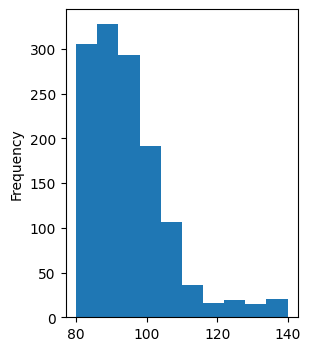

In [14]:
plt.figure(figsize=(3, 4))
df['bloodpressure'].plot(kind='hist')
plt.show()


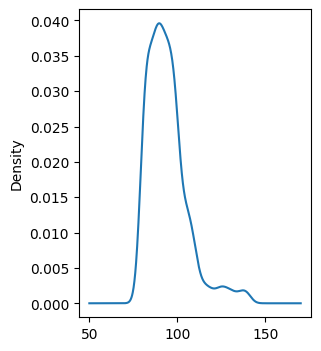

In [15]:
plt.figure(figsize=(3, 4))
df['bloodpressure'].plot(kind='kde')
plt.show()

In [16]:
df['bloodpressure'].skew() ## positive skew
                           ## right distribution of data

1.4838579128667744

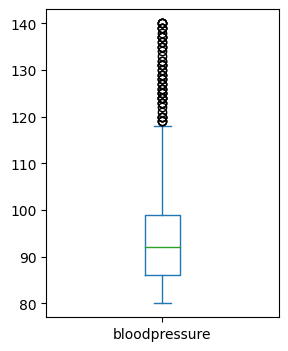

In [17]:
plt.figure(figsize=(3, 4))
df['bloodpressure'].plot(kind='box')
plt.show()

In [18]:
df[df['bloodpressure'] > 120] # lot of outliers value so no needed to remove

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1147,1148,29.0,female,32.7,128,Yes,2,No,northwest,26018.95
1150,1151,55.0,female,27.1,135,No,1,No,southwest,26140.36
1152,1153,38.0,female,35.9,128,No,1,No,northeast,26392.26
1153,1154,43.0,male,36.8,126,No,2,No,northwest,26467.10
1154,1155,31.0,male,23.8,126,Yes,0,Yes,southeast,26926.51
1156,1157,46.0,female,23.0,137,Yes,0,Yes,southeast,27037.91
1161,1162,22.0,male,22.4,137,Yes,2,No,northeast,27375.90
1166,1167,23.0,male,26.7,123,Yes,0,Yes,northeast,28101.33
1169,1170,27.0,male,36.7,130,No,1,No,northwest,28468.92
1174,1175,44.0,female,29.1,139,No,0,Yes,northwest,29141.36


In [19]:
df['age'].describe()

,age
count,1332.000000
mean,38.086336
std,11.112804
min,18.000000
25%,29.000000
50%,38.000000
75%,47.000000
max,60.000000


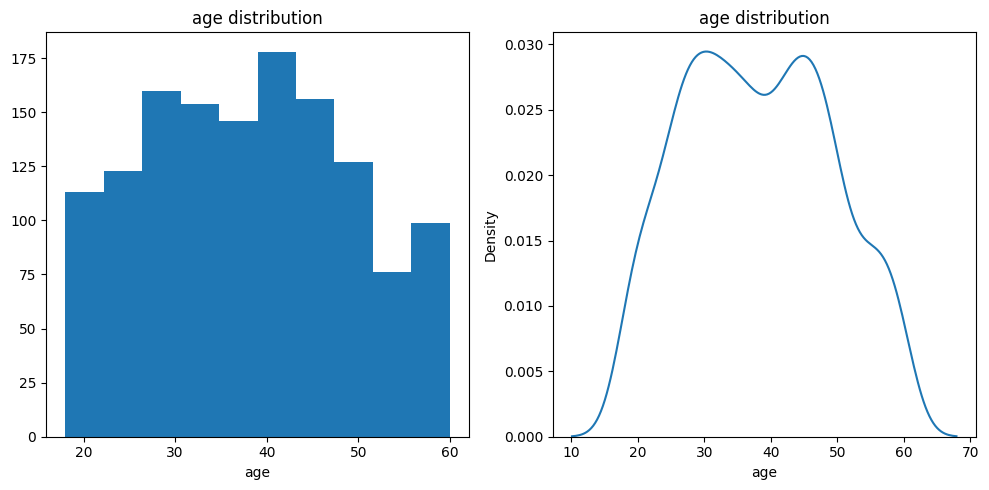

In [20]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].hist(df['age'])
ax[0].set_title('age distribution')
ax[0].set_xlabel('age')

sns.kdeplot(df['age'], ax=ax[1])
ax[1].set_title('age distribution')

plt.tight_layout()
plt.show()

In [21]:
df['age'].skew() ## almost no skew  # almost normal distribution

0.11172909283724285

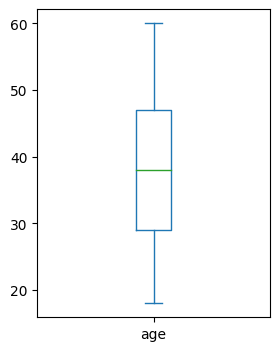

In [22]:
plt.figure(figsize=(3, 4))
df['age'].plot(kind='box')  # no outliers
plt.show()

In [23]:
df['children'].describe()

,children
count,1332.000000
mean,1.099850
std,1.205958
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


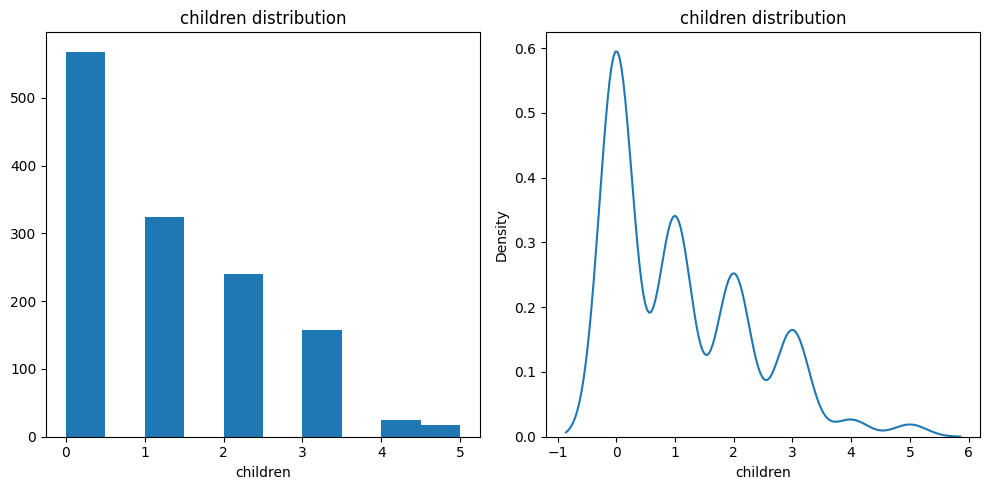

In [24]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].hist(df['children'])
ax[0].set_title('children distribution')
ax[0].set_xlabel('children')

sns.kdeplot(df['children'], ax=ax[1])
ax[1].set_title('children distribution')

plt.tight_layout()
plt.show()

In [25]:
df['children'].skew() # slightly positive skew # slightly right distribution

0.9326171188931703

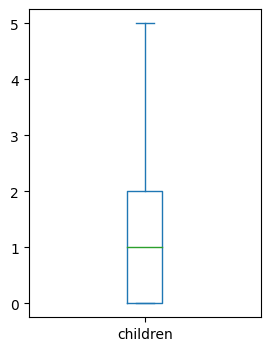

In [26]:
plt.figure(figsize=(3, 4))
df['children'].plot(kind='box')
plt.show()

In [27]:
df['claim'].describe()

,claim
count,1332.000000
mean,13325.246426
std,12109.620712
min,1121.870000
25%,4760.157500
50%,9412.965000
75%,16781.327500
max,63770.430000


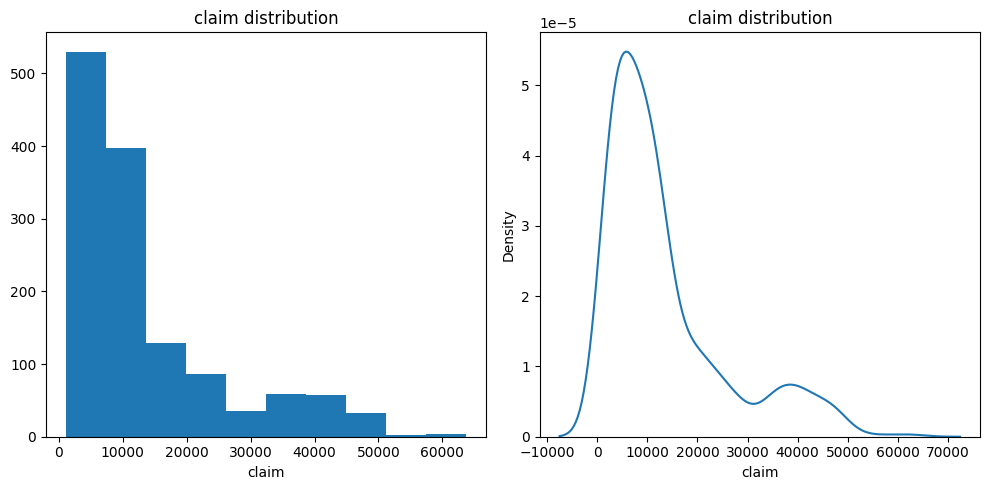

In [28]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].hist(df['claim'])
ax[0].set_title('claim distribution')
ax[0].set_xlabel('claim')

sns.kdeplot(df['claim'], ax=ax[1])
ax[1].set_title('claim distribution')

plt.tight_layout()
plt.show()

In [29]:
df['claim'].skew() # positive skew #right distribution

1.513847422927789

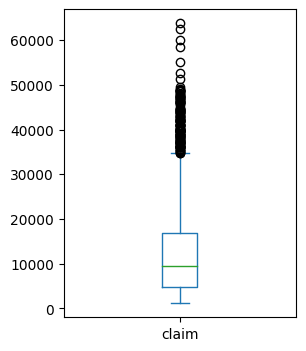

In [30]:
plt.figure(figsize=(3, 4))
df['claim'].plot(kind='box')  #outliers exist
plt.show()

In [31]:
df[df['claim'] > 35000]
df[df['claim'] > 60000] # no need to remove outliers

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


**Univariate Analysis on Categorical columns**

In [32]:
df['gender'].value_counts()

,count
gender,
male,670
female,662


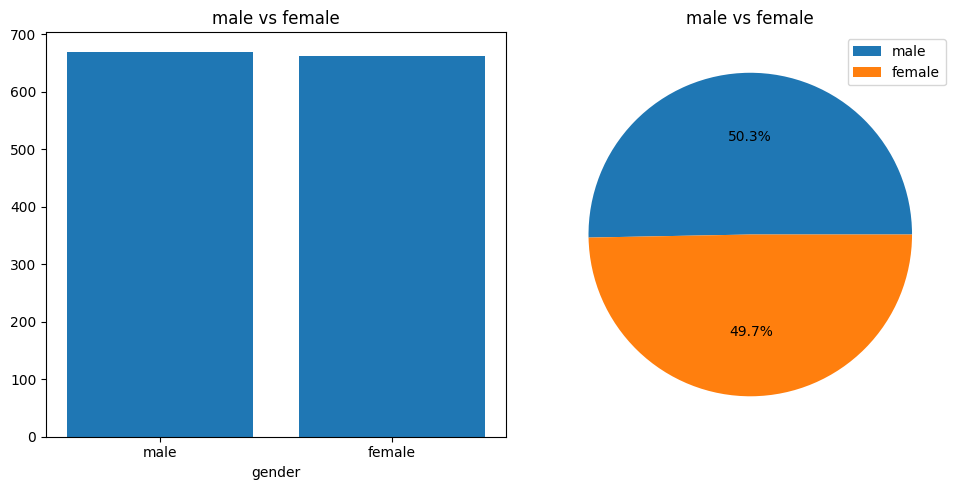

In [33]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].bar(df['gender'].value_counts().index, df['gender'].value_counts().values)
ax[0].set_title('male vs female')
ax[0].set_xlabel('gender')

ax[1].pie(df['gender'].value_counts(), autopct='%1.1f%%')
ax[1].legend(labels=df['gender'].value_counts().index)
ax[1].set_title('male vs female')

plt.tight_layout()
plt.show()

In [34]:
df['diabetic'].value_counts()

,count
diabetic,
No,695
Yes,637


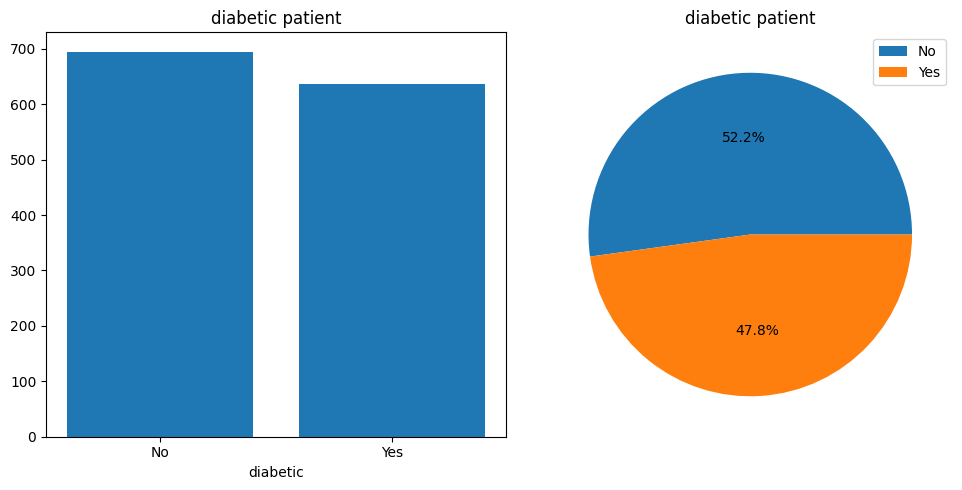

In [35]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].bar(df['diabetic'].value_counts().index, df['diabetic'].value_counts().values)
ax[0].set_title('diabetic patient')
ax[0].set_xlabel('diabetic')

ax[1].pie(df['diabetic'].value_counts(), autopct='%1.1f%%')
ax[1].legend(labels=df['diabetic'].value_counts().index)
ax[1].set_title('diabetic patient')

plt.tight_layout()
plt.show()

In [36]:
df['smoker'].describe()

,smoker
count,1332
unique,2
top,No
freq,1058


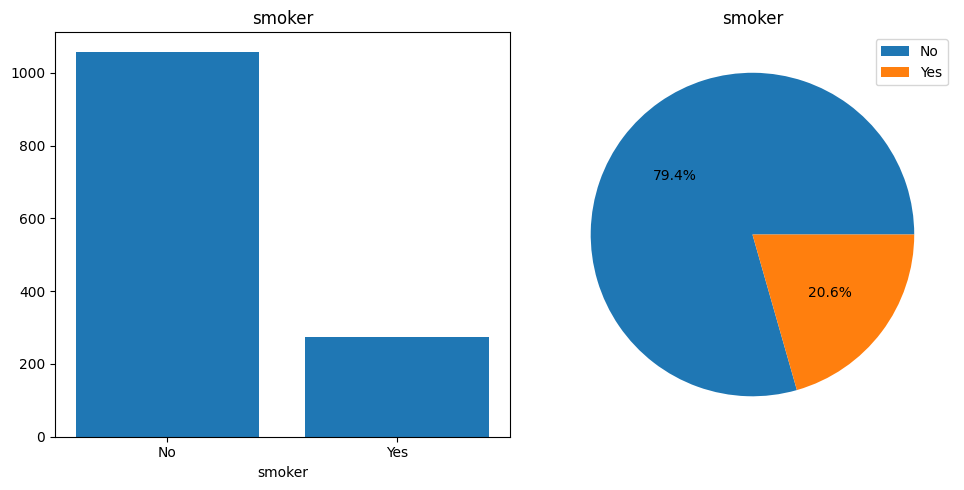

In [37]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].bar(df['smoker'].value_counts().index, df['smoker'].value_counts().values)
ax[0].set_title('smoker')
ax[0].set_xlabel('smoker')

ax[1].pie(df['smoker'].value_counts(), autopct='%1.1f%%')
ax[1].legend(labels=df['smoker'].value_counts().index)
ax[1].set_title('smoker')

plt.tight_layout()
plt.show()

In [38]:
df['region'].describe()

,region
count,1332
unique,4
top,southeast
freq,442


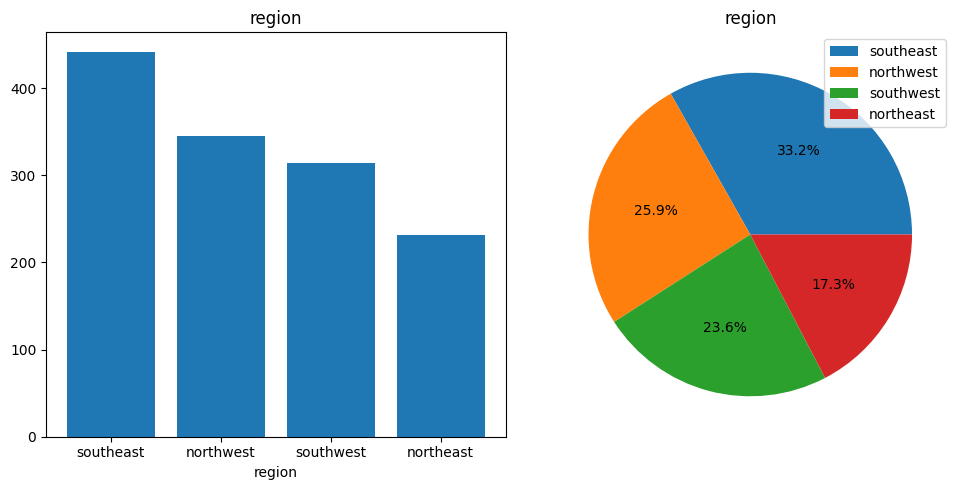

In [39]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].bar(df['region'].value_counts().index, df['region'].value_counts().values)
ax[0].set_title('region')
ax[0].set_xlabel('region')

ax[1].pie(df['region'].value_counts(), autopct='%1.1f%%')
ax[1].legend(labels=df['region'].value_counts().index)
ax[1].set_title('region')

plt.tight_layout()
plt.show()

**Bivariate Analysis**

- Numeric to Numeric
- Categorical to Categorical
- Numeric to Categorical

#### Categorical to Categorical


In [40]:
## Gender vs. Smoker

# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['smoker'])
contingency_table

smoker,No,Yes
gender,,
female,547,115
male,511,159


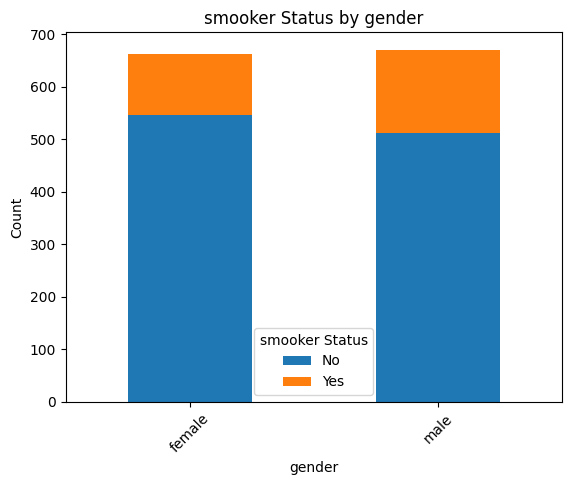

In [41]:
# Plotting the count plot using pandas
contingency_table.plot(kind='bar', stacked=True)

# Customizing the plot
plt.title('smooker Status by gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(title='smooker Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

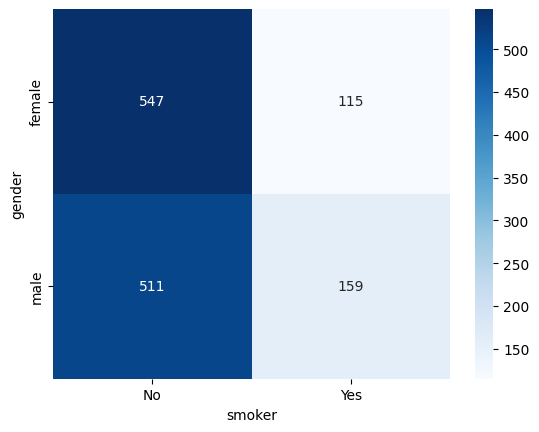

In [42]:
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='g')
plt.show()

In [43]:
## Gender vs. Region

# Create a contingency table
contingency_table_1 = pd.crosstab(df['gender'], df['region'])
contingency_table_1

region,northeast,northwest,southeast,southwest
gender,,,,
female,112,164,224,162
male,119,181,218,152


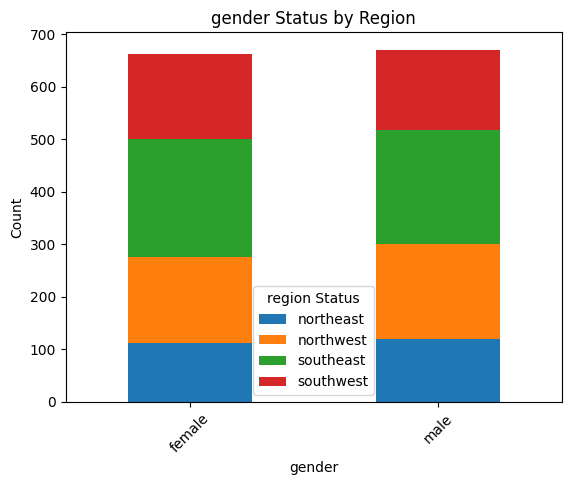

In [44]:
# Plotting the count plot using pandas
contingency_table_1.plot(kind='bar', stacked=True)

# Customizing the plot
plt.title('gender Status by Region')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(title='region Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

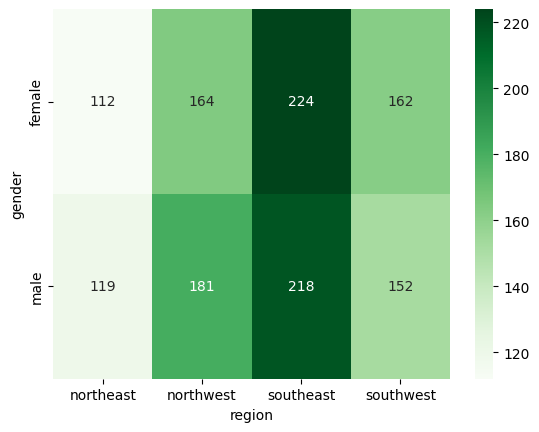

In [45]:
sns.heatmap(contingency_table_1, annot=True, cmap='Greens', fmt='g')
plt.show()

In [46]:
## Diabetic vs. Smoker

# Create a contingency table
contingency_table_2 = pd.crosstab(df['smoker'], df['diabetic'])
contingency_table_2

diabetic,No,Yes
smoker,,
No,557,501
Yes,138,136


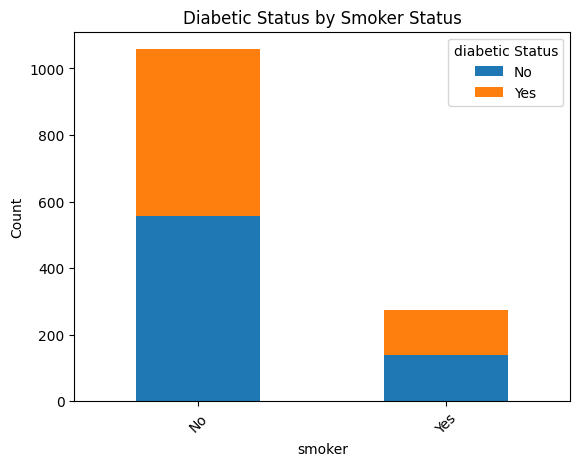

In [47]:
# Plotting the count plot using pandas
contingency_table_2.plot(kind='bar', stacked=True)

# Customizing the plot
plt.title('Diabetic Status by Smoker Status')
plt.xlabel('smoker')
plt.ylabel('Count')
plt.legend(title='diabetic Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

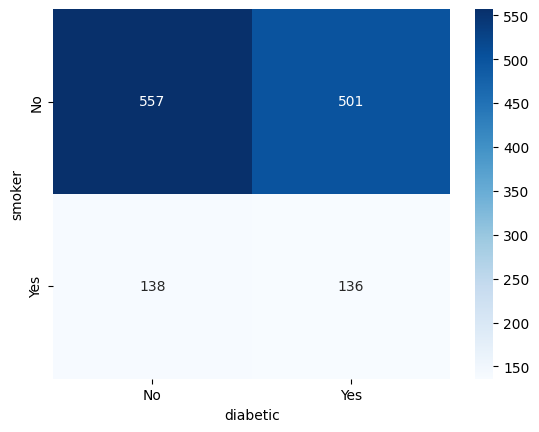

In [48]:
sns.heatmap(contingency_table_2, annot=True, cmap='Blues', fmt='g')
plt.show()

In [49]:
## Diabetic vs. Region

# Create a contingency table
contingency_table_3 = pd.crosstab(df['diabetic'], df['region'])
contingency_table_3

region,northeast,northwest,southeast,southwest
diabetic,,,,
No,110,190,225,170
Yes,121,155,217,144


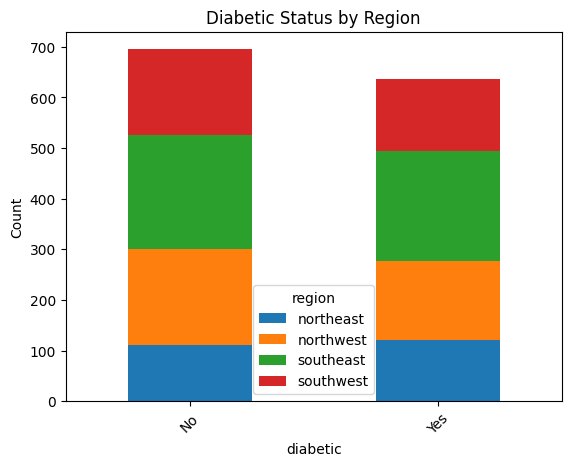

In [50]:
# Plotting the count plot using pandas
contingency_table_3.plot(kind='bar', stacked=True)

# Customizing the plot
plt.title('Diabetic Status by Region')
plt.xlabel('diabetic')
plt.ylabel('Count')
plt.legend(title='region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

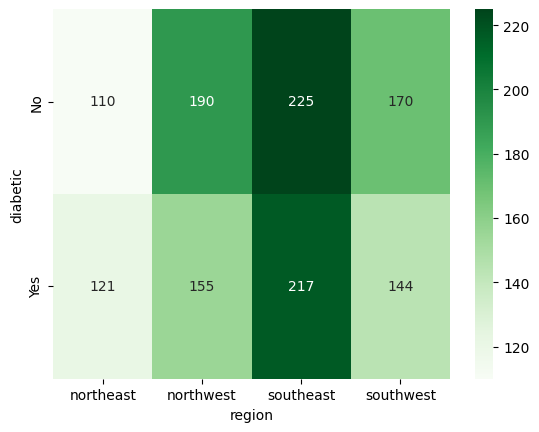

In [51]:
sns.heatmap(contingency_table_3, annot=True, cmap='Greens', fmt='g')
plt.show()

In [52]:
## Smoker vs. Region

# Create a contingency table
contingency_table_4 = pd.crosstab(df['region'], df['smoker'])
contingency_table_4

smoker,No,Yes
region,,
northeast,164,67
northwest,287,58
southeast,351,91
southwest,256,58


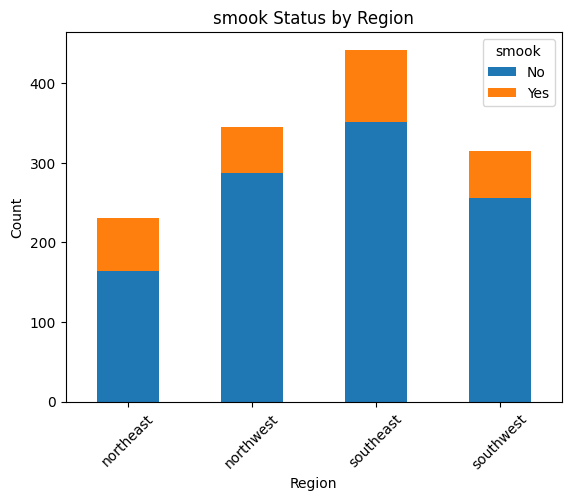

In [53]:
# Plotting the count plot using pandas
contingency_table_4.plot(kind='bar', stacked=True)

# Customizing the plot
plt.title('smook Status by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='smook')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

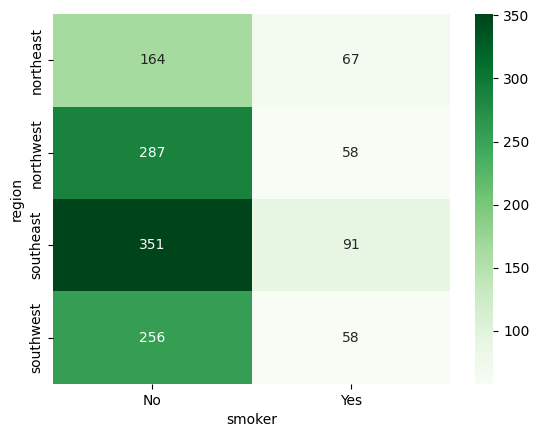

In [54]:
sns.heatmap(contingency_table_4, annot=True, cmap='Greens', fmt='g')
plt.show()

**Feature Engineering on blood_pressure col**

In [61]:
def blood_pressure_categories(bp_val):
    if bp_val < 90:
        return 'low'

    elif 90 <= bp_val < 120:
        return 'Normal'

    elif 120 <= bp_val < 130:
        return 'Elevated,(Blood pressure is slightly higher than normal)'

    elif 130 <= bp_val < 140:
        return 'Hypertension Stage 1,(High Blood Pressure, Stage 1)'

    else:
        return 'Hypertension Stage 2,(High Blood Pressure, Stage 2)'





df['bloodpressure_category'] = df['bloodpressure'].apply(blood_pressure_categories)


,bloodpressure,bloodpressure_category
0,91,Normal
1,87,low
7,100,Normal
8,86,low
9,97,Normal


In [65]:
df[['bloodpressure', 'bloodpressure_category']].sample(5)


,bloodpressure,bloodpressure_category
18,97,Normal
519,88,low
1011,109,Normal
1187,83,low
111,80,low


In [74]:
#changing dtypes
df['bloodpressure_category'] = df['bloodpressure_category'].astype('category')

**univariate analysis on blood_pressure_category col**


In [75]:
df['bloodpressure_category'].value_counts()

,count
bloodpressure_category,
Normal,751
low,522
"Elevated,(Blood pressure is slightly higher than normal)",30
"Hypertension Stage 1,(High Blood Pressure, Stage 1)",24
"Hypertension Stage 2,(High Blood Pressure, Stage 2)",5


<ipython-input-85-2306b93ca092>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df['bloodpressure_category'].value_counts().index , rotation=55)


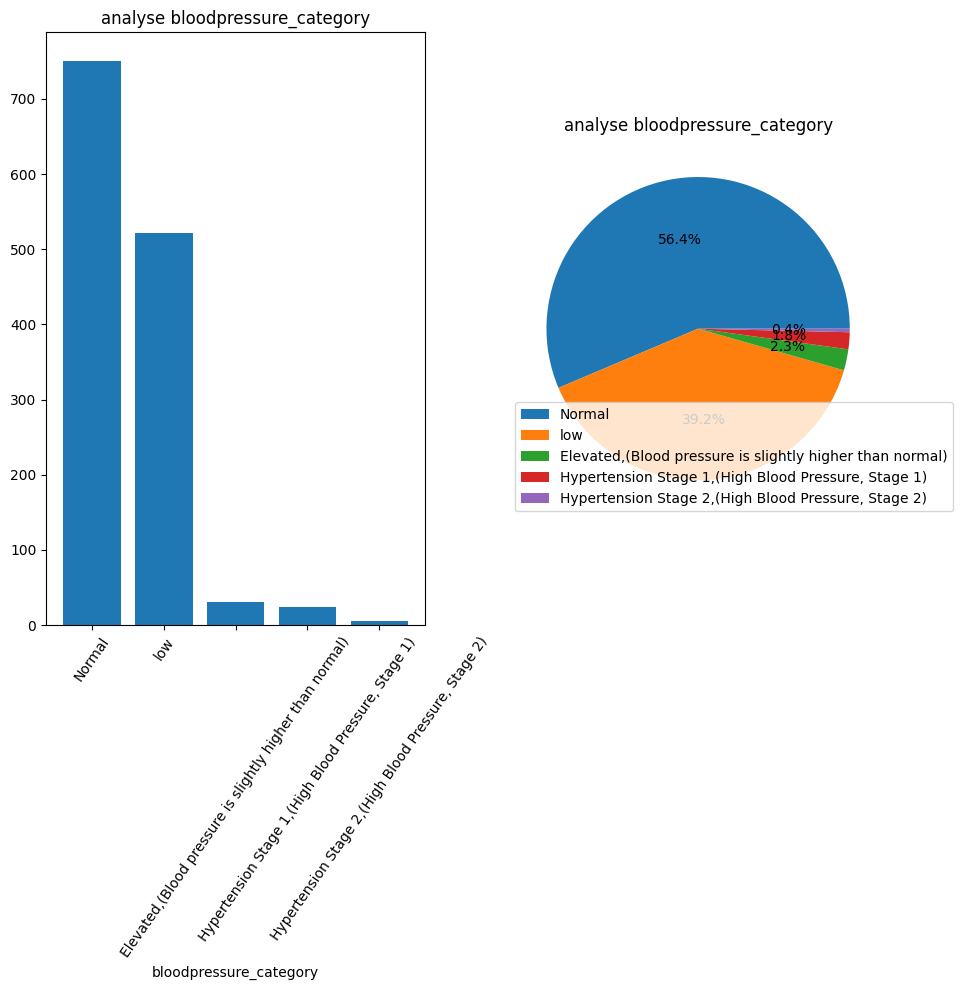

In [85]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

ax[0].bar(df['bloodpressure_category'].value_counts().index, df['bloodpressure_category'].value_counts().values)
ax[0].set_title('analyse bloodpressure_category')
ax[0].set_xlabel('bloodpressure_category')
ax[0].set_xticklabels(df['bloodpressure_category'].value_counts().index , rotation=55)

ax[1].pie(df['bloodpressure_category'].value_counts(), autopct='%1.1f%%')
ax[1].legend(labels=df['bloodpressure_category'].value_counts().index)
ax[1].set_title('analyse bloodpressure_category')

plt.tight_layout()
plt.show()

**Bivariate Analysis Blood_pressure_categories**

In [90]:
# blood pressure category vs gender
contingency_table_5 = pd.crosstab(df['bloodpressure_category'], df['gender'])
contingency_table_5

gender,female,male
bloodpressure_category,,
"Elevated,(Blood pressure is slightly higher than normal)",11,19
"Hypertension Stage 1,(High Blood Pressure, Stage 1)",13,11
"Hypertension Stage 2,(High Blood Pressure, Stage 2)",2,3
Normal,378,373
low,258,264


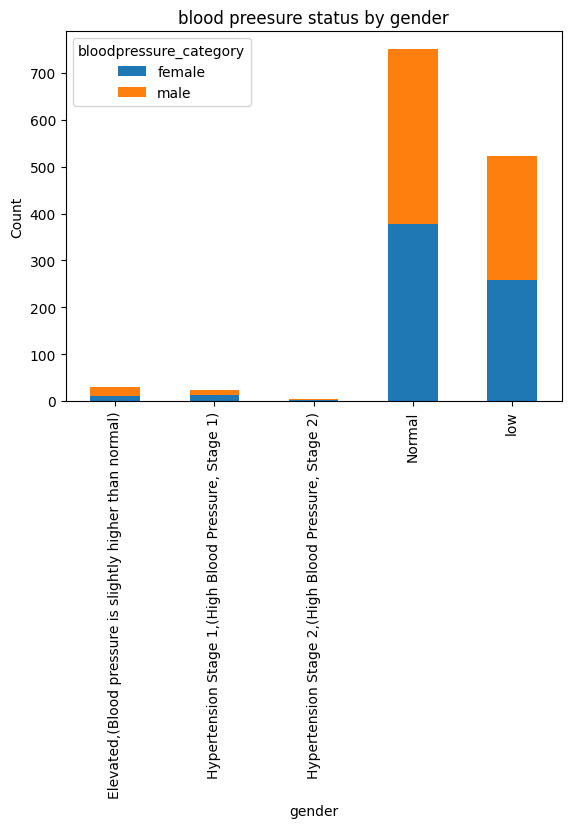

In [92]:
# Plotting the count plot using pandas
contingency_table_5.plot(kind='bar', stacked=True)

# Customizing the plot
plt.title('blood preesure status by gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(title='bloodpressure_category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

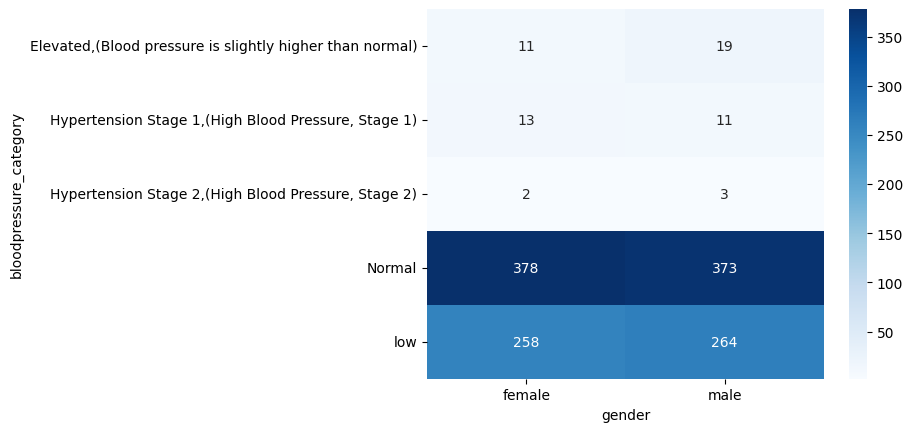

In [93]:
sns.heatmap(contingency_table_5, annot=True, cmap='Blues', fmt='g')
plt.show()

In [94]:
# blood pressure category vs region
contingency_table_6 = pd.crosstab(df['bloodpressure_category'], df['region'])
contingency_table_6

region,northeast,northwest,southeast,southwest
bloodpressure_category,,,,
"Elevated,(Blood pressure is slightly higher than normal)",6,3,14,7
"Hypertension Stage 1,(High Blood Pressure, Stage 1)",7,5,8,4
"Hypertension Stage 2,(High Blood Pressure, Stage 2)",2,0,1,2
Normal,126,197,245,183
low,90,140,174,118


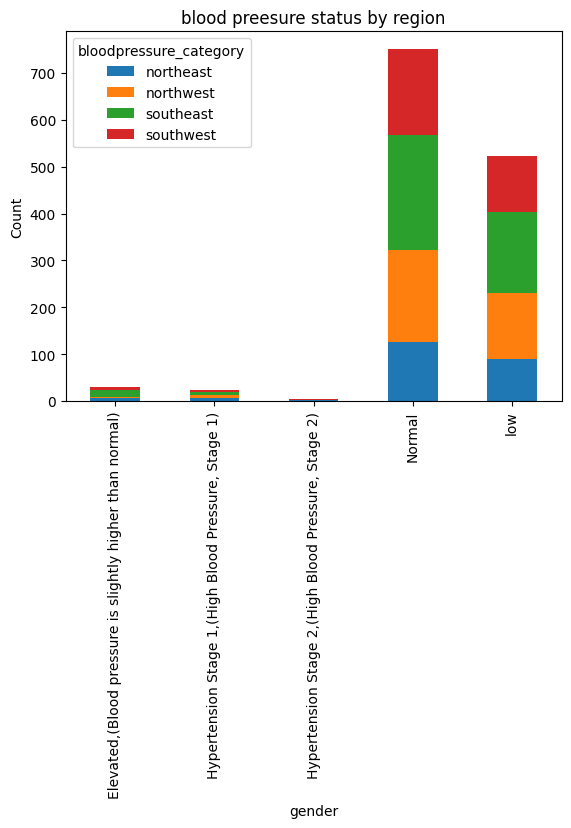

In [95]:
# Plotting the count plot using pandas
contingency_table_6.plot(kind='bar', stacked=True)

# Customizing the plot
plt.title('blood preesure status by region')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(title='bloodpressure_category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

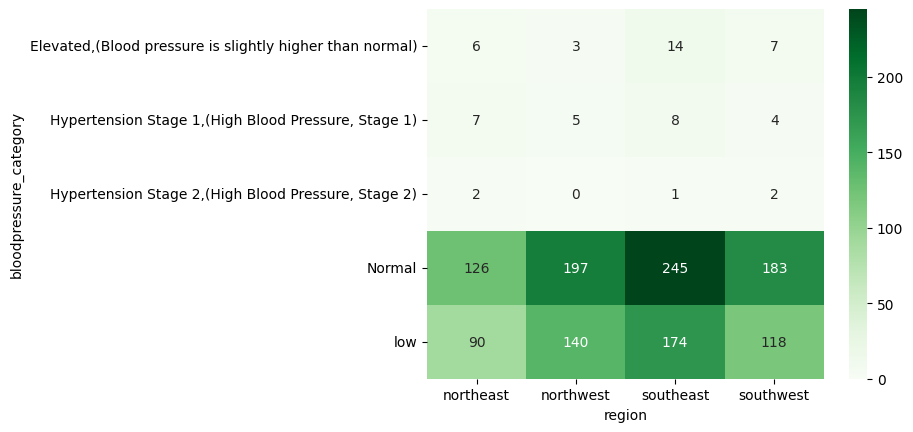

In [96]:
sns.heatmap(contingency_table_6, annot=True, cmap='Greens', fmt='g')
plt.show()

**IMPORTANT**

**CLAIM --> Targeted Column**

**UNIVARIATE ANALYSIS**

In [98]:
df['claim'].describe()

,claim
count,1332.000000
mean,13325.246426
std,12109.620712
min,1121.870000
25%,4760.157500
50%,9412.965000
75%,16781.327500
max,63770.430000


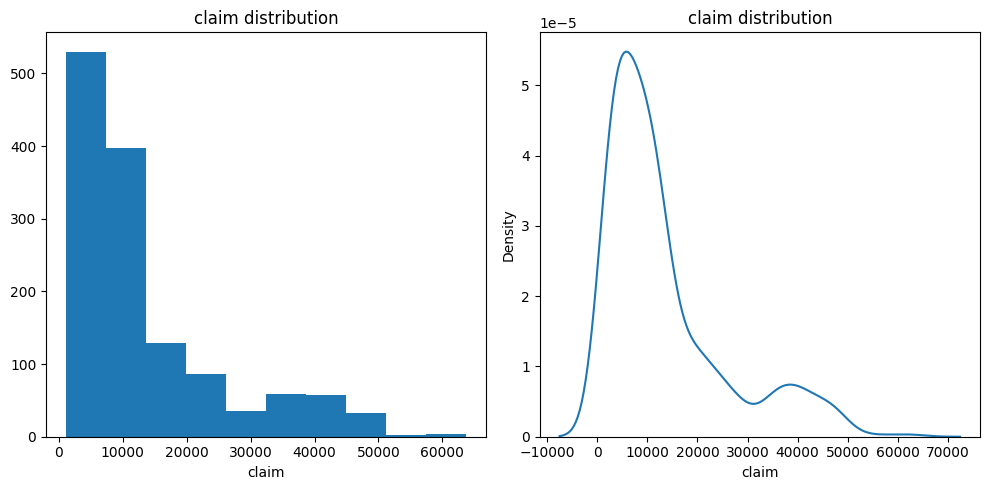

In [99]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].hist(df['claim'])
ax[0].set_title('claim distribution')
ax[0].set_xlabel('claim')

sns.kdeplot(df['claim'], ax=ax[1])
ax[1].set_title('claim distribution')

plt.tight_layout()
plt.show()

**BIVARIATE ANALYSIS**

In [181]:
# claim vs gender
claim_vs_gender = df[['claim', 'gender']]

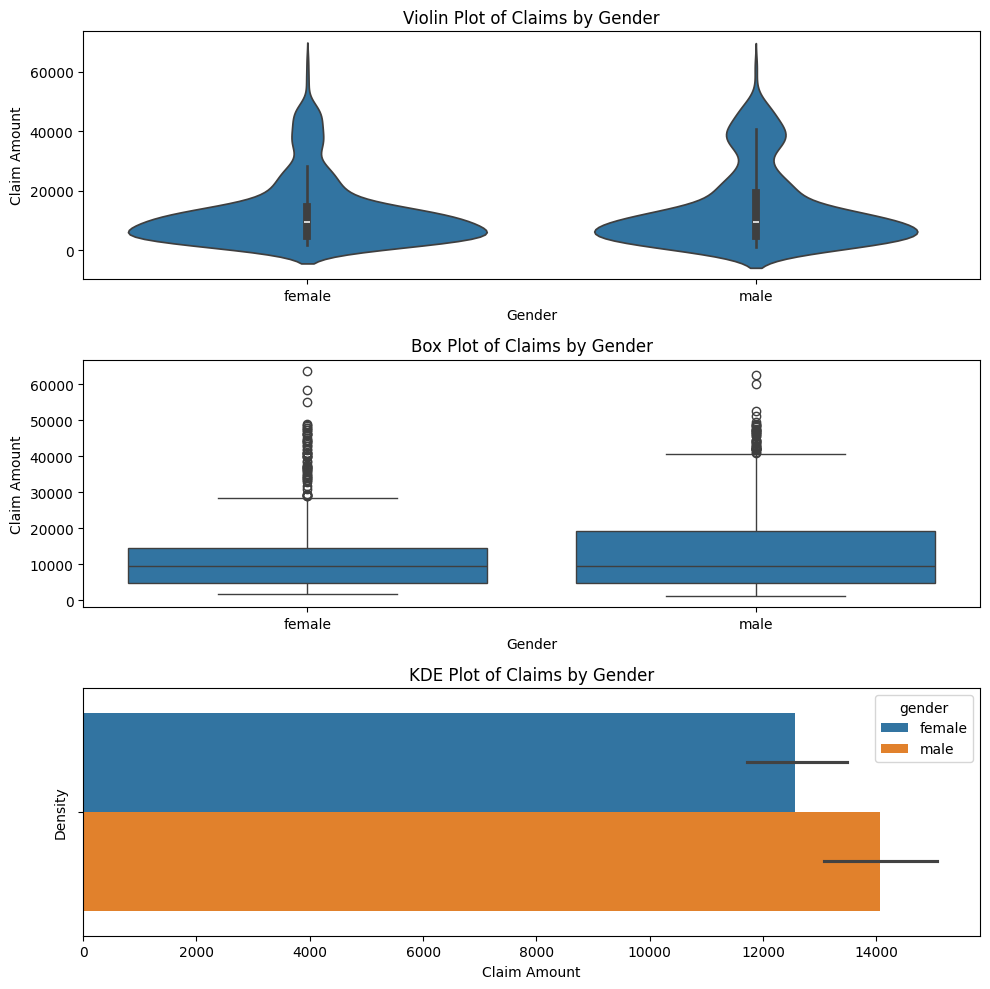

In [198]:

# Create a figure and axes with specified rows and columns
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))  # Adjusted figsize for better visibility

# Create the violin plot on the first subplot
sns.violinplot(x='gender', y='claim', data=claim_vs_gender, ax=ax[0])
ax[0].set_title('Violin Plot of Claims by Gender')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Claim Amount')

# Create the box plot on the next subplot
sns.boxplot(x='gender', y='claim', data=claim_vs_gender, ax=ax[1])
ax[1].set_title('Box Plot of Claims by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Claim Amount')

# Create the KDE plot for claims by gender (bivariate)
sns.barplot(x='claim', hue='gender', data=claim_vs_gender, ax=ax[2])
ax[2].set_title('KDE Plot of Claims by Gender')
ax[2].set_xlabel('Claim Amount')
ax[2].set_ylabel('Density')


# Show the plot
plt.tight_layout()  # Adjusts subplots to fit into the figure area
plt.show()


In [205]:
## Claim vs. diabetic
claim_vs_diabetic = df[['claim', 'diabetic']]

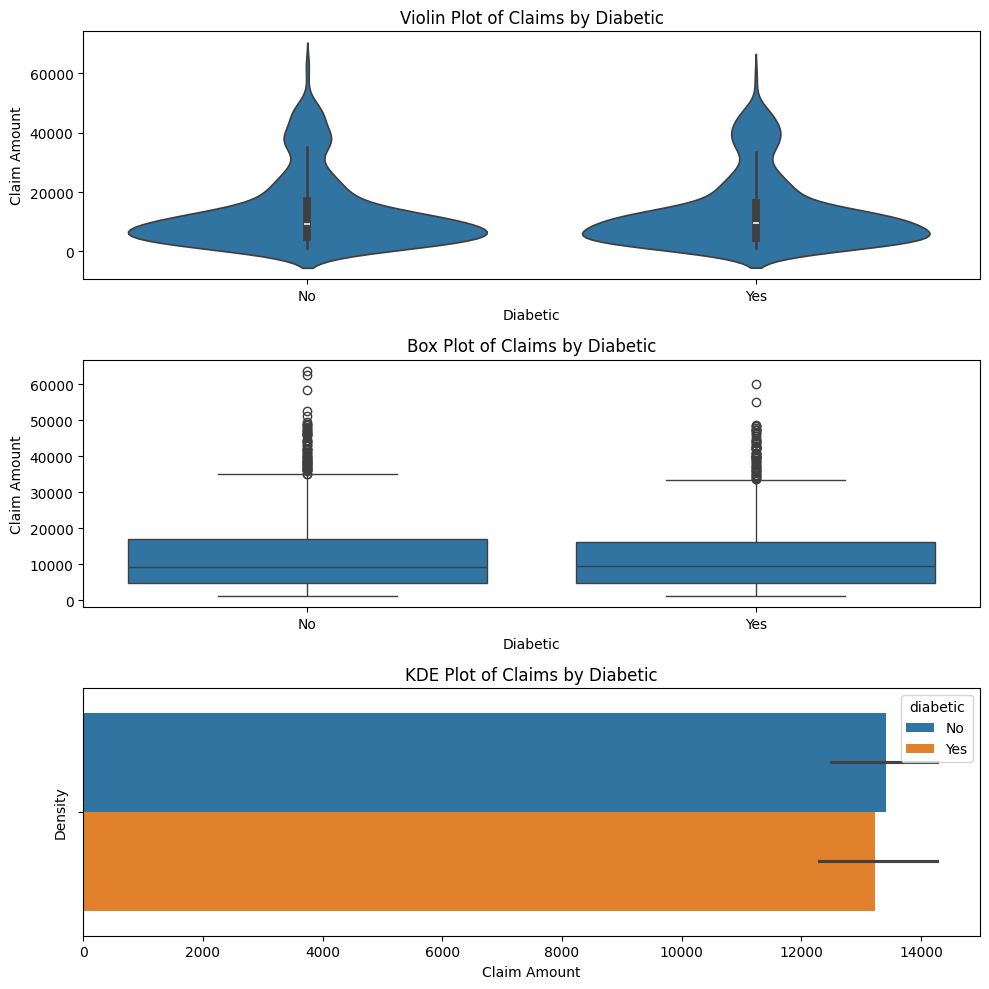

In [206]:

# Create a figure and axes with specified rows and columns
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))  # Adjusted figsize for better visibility

# Create the violin plot on the first subplot
sns.violinplot(x='diabetic', y='claim', data=claim_vs_diabetic, ax=ax[0])
ax[0].set_title('Violin Plot of Claims by Diabetic')
ax[0].set_xlabel('Diabetic')
ax[0].set_ylabel('Claim Amount')

# Create the box plot on the next subplot
sns.boxplot(x='diabetic', y='claim', data=claim_vs_diabetic, ax=ax[1])
ax[1].set_title('Box Plot of Claims by Diabetic')
ax[1].set_xlabel('Diabetic')
ax[1].set_ylabel('Claim Amount')

# Create the KDE plot for claims by gender (bivariate)
sns.barplot(x='claim', hue='diabetic', data=claim_vs_diabetic, ax=ax[2])
ax[2].set_title('KDE Plot of Claims by Diabetic')
ax[2].set_xlabel('Claim Amount')
ax[2].set_ylabel('Density')


# Show the plot
plt.tight_layout()  # Adjusts subplots to fit into the figure area
plt.show()


In [207]:
## Claim vs. smooker
claim_vs_smooker = df[['claim', 'smoker']]

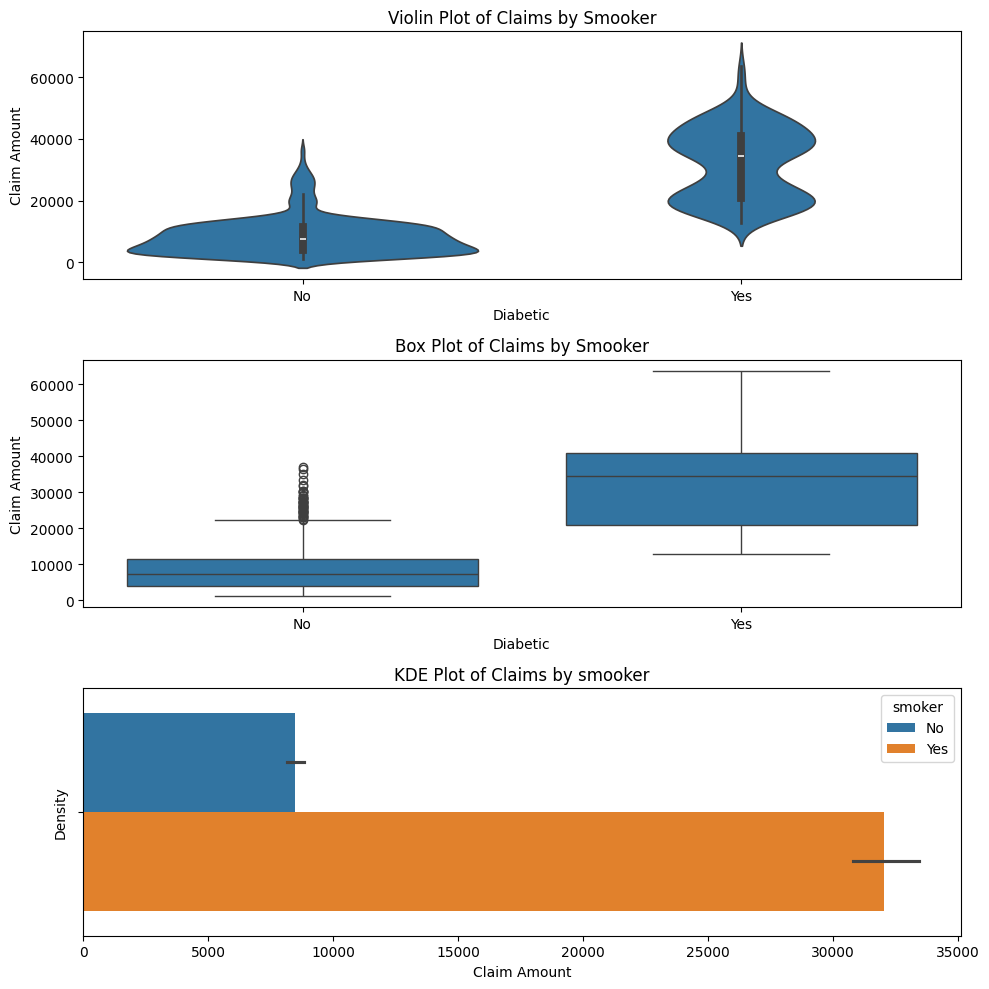

In [209]:

# Create a figure and axes with specified rows and columns
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))  # Adjusted figsize for better visibility

# Create the violin plot on the first subplot
sns.violinplot(x='smoker', y='claim', data=claim_vs_smooker, ax=ax[0])
ax[0].set_title('Violin Plot of Claims by Smooker')
ax[0].set_xlabel('Diabetic')
ax[0].set_ylabel('Claim Amount')

# Create the box plot on the next subplot
sns.boxplot(x='smoker', y='claim', data=claim_vs_smooker, ax=ax[1])
ax[1].set_title('Box Plot of Claims by Smooker')
ax[1].set_xlabel('Diabetic')
ax[1].set_ylabel('Claim Amount')

# Create the KDE plot for claims by gender (bivariate)
sns.barplot(x='claim', hue='smoker', data=claim_vs_smooker, ax=ax[2])
ax[2].set_title('KDE Plot of Claims by smooker')
ax[2].set_xlabel('Claim Amount')
ax[2].set_ylabel('Density')


# Show the plot
plt.tight_layout()  # Adjusts subplots to fit into the figure area
plt.show()


In [210]:
## Claim vs region
claim_vs_region = df[['claim' , 'region']]

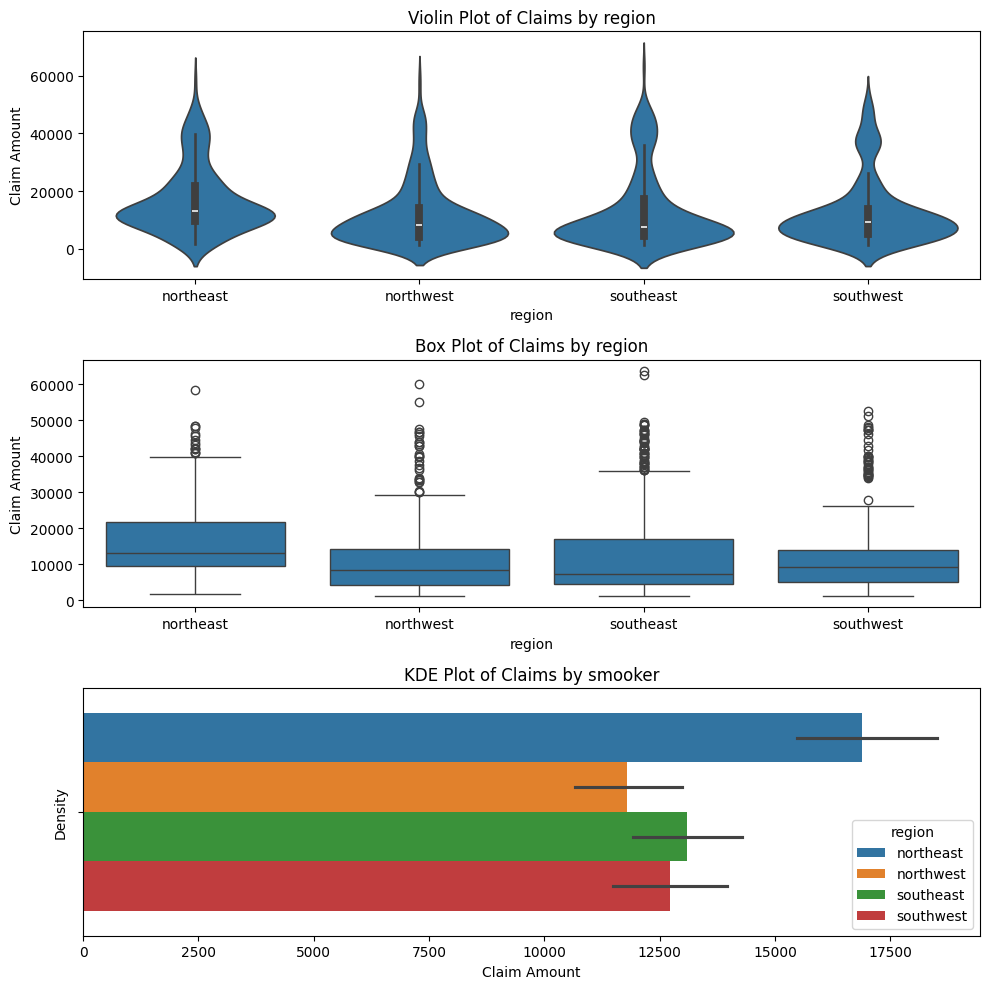

In [211]:

# Create a figure and axes with specified rows and columns
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))  # Adjusted figsize for better visibility

# Create the violin plot on the first subplot
sns.violinplot(x='region', y='claim', data=claim_vs_region, ax=ax[0])
ax[0].set_title('Violin Plot of Claims by region')
ax[0].set_xlabel('region')
ax[0].set_ylabel('Claim Amount')

# Create the box plot on the next subplot
sns.boxplot(x='region', y='claim', data=claim_vs_region, ax=ax[1])
ax[1].set_title('Box Plot of Claims by region')
ax[1].set_xlabel('region')
ax[1].set_ylabel('Claim Amount')

# Create the KDE plot for claims by gender (bivariate)
sns.barplot(x='claim', hue='region', data=claim_vs_region, ax=ax[2])
ax[2].set_title('KDE Plot of Claims by smooker')
ax[2].set_xlabel('Claim Amount')
ax[2].set_ylabel('Density')


# Show the plot
plt.tight_layout()  # Adjusts subplots to fit into the figure area
plt.show()


**CONCLUSION**

- Generally, males tend to claim insurance at a higher rate than females, although the difference is not significant.

- Smokers claim insurance at a much higher rate compared to non-smokers, who have a lower claim rate.

- The Northeast region has the highest rate of insurance claims, while the Northwest region has the lowest.

- The claim rate among smokers is significantly higher than that of non-smokers.

- Interestingly, the claim rate for smokers is nearly the same for both males and females.

- The majority of both males and females come from the Southeast region, while fewer are from the Northeast.

- Unfortunately, both diabetic and non-diabetic individuals have an almost equal smoking rate.

- Most individuals have normal blood pressure, and very few have extremely high blood pressure.